In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Load dataset
df = pd.read_csv("C:/Users/Haji Moinuddin/OneDrive/Desktop/Housing.csv")
print("Dataset loaded successfully!")

Dataset loaded successfully!


In [3]:
# Quick look at the data
print(df.head())
print("\nDataset Info:\n", df.info())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 colu

In [4]:
# Handle missing values if any
df = df.dropna()
print("\nMissing values handled (if any).")


Missing values handled (if any).


In [5]:
# Simple Linear Regression: Area vs Price
X = df[['area']]  # Independent variable
y = df['price']   # Dependent variable

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Initialize and train model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
y_pred = lr.predict(X_test)


In [7]:
# Evaluate model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nSimple Linear Regression Evaluation:")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Simple Linear Regression Evaluation:
Mean Absolute Error: 1474748.1337969352
Mean Squared Error: 3675286604768.185
R² Score: 0.27287851871974644


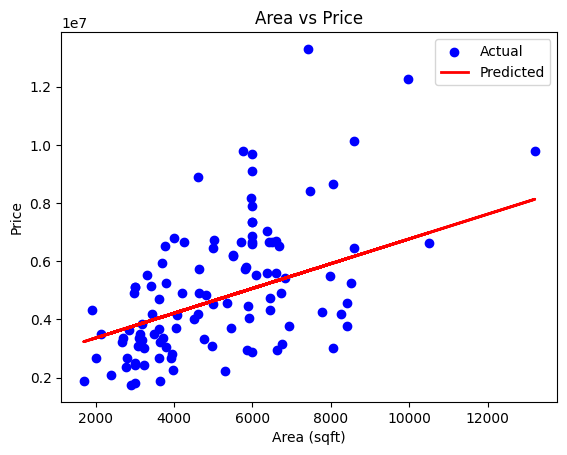

In [8]:
# Plot regression line
plt.scatter(X_test, y_test, color='blue', label="Actual")
plt.plot(X_test, y_pred, color='red', linewidth=2, label="Predicted")
plt.title('Area vs Price')
plt.xlabel('Area (sqft)')
plt.ylabel('Price')
plt.legend()
plt.show()

In [9]:
# Print model coefficients
print(f"Intercept: {lr.intercept_}")
print(f"Coefficient for area: {lr.coef_[0]}")

Intercept: 2512254.2639593435
Coefficient for area: 425.72984193878284


In [10]:
# Multiple Linear Regression
features = ['area', 'bedrooms', 'bathrooms']
X_multi = df[features]
y_multi = df['price']

X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

lr_multi = LinearRegression()
lr_multi.fit(X_train_multi, y_train_multi)

y_pred_multi = lr_multi.predict(X_test_multi)

# Evaluate multiple regression model
print(f"\nMultiple Linear Regression Evaluation:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test_multi, y_pred_multi)}")
print(f"Mean Squared Error: {mean_squared_error(y_test_multi, y_pred_multi)}")
print(f"R² Score: {r2_score(y_test_multi, y_pred_multi)}")


Multiple Linear Regression Evaluation:
Mean Absolute Error: 1265275.6699454375
Mean Squared Error: 2750040479309.052
R² Score: 0.45592991188724463


In [11]:
# Coefficients Interpretation
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': lr_multi.coef_
})
print("\nCoefficients:\n", coef_df)

print("Linear Regression task completed.")


Coefficients:
      Feature   Coefficient
0       area  3.454666e+02
1   bedrooms  3.601977e+05
2  bathrooms  1.422320e+06
Linear Regression task completed.
